<img src="netflix-logo.png" width="30%" height="30%" align="center">  

# **Mission 1. Netfilx and Code**

## **Mandatory Part**

### Q: How many *Korean* contents are listed in Netflix? (country column, exclusively in South Korea)
#### A: *183*

In [1]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [2]:
df.country

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

In [3]:
# Using value_counts()
print("South Korean Contents in Netflix:\n")
print(df['country'].value_counts().head(),"\n")
print(df['country'].value_counts().index[:5][-1])
print(df['country'].value_counts().values[:5][-1])

South Korean Contents in Netflix:

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64 

South Korea
183


## **Bonus Part**

### Q: **Which country** has the **largest** contents in Netflix and **how many** of its contents?
#### A: *United States*

In [4]:
df['country'].dtype

dtype('O')

In [5]:
df['country'].value_counts(dropna=False)

United States                                                     2555
India                                                              923
NaN                                                                507
United Kingdom                                                     397
Japan                                                              226
                                                                  ... 
Bulgaria                                                             1
Peru, Germany, Norway                                                1
Cambodia                                                             1
Germany, France, Luxembourg, United Kingdom, United States           1
United Kingdom, Namibia, South Africa, Zimbabwe, United States       1
Name: country, Length: 682, dtype: int64

value_counts() 메서드로 그냥 바로 나오긴 한다.  
NaN 값 전체를 인도에 포함시켜도 미국을 넘을 순 없다. 

---
# **Spin Off**
## split 메서드를 사용해서 single country를 분류해보자

NaN이 존재하기 때문에 split에서 에러가 났다.  
Missing value를 체크해보자.  
pandas 에서는 isna() 메서드로 체크가 가능하다.  
또한 예전에 캐글에서 봐둔 missing value table 만드는 함수도 다시 사용해보자.  

### Missing values table

In [6]:
def missing_values_table(df):# Function to calculate missing values by column# Funct 
    mis_val = df.isnull().sum() # Total missing values
    mis_val_pct = 100 * df.isnull().sum() / len(df)# Percentage of missing values
    mis_val_df = pd.concat([mis_val, mis_val_pct], axis=1)# Make a table with the results
    mis_val_df_cols = mis_val_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})# Rename the columns
    mis_val_df_cols = mis_val_df_cols[mis_val_df_cols.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)# Sort the table by percentage of missing descending
    print ("Dataframe has " + str(df.shape[1]) + " columns.\n" 
           "There are " + str(mis_val_df_cols.shape[0]) + " cols having missing values.")# Print some summary information
    return mis_val_df_cols # Return the dataframe with missing information

In [7]:
missing_values_table(df)

Dataframe has 12 columns.
There are 5 cols having missing values.


,Missing Values,% of Total Values
director,2389,30.7
cast,718,9.2
country,507,6.5
date_added,10,0.1
rating,7,0.1


director, cast, country, date_added, rating 5개의 columns들에서 missing value들이 존재하고  
director는 30%나 있다.  
director가 NaN이 30%는 좀 이상한데 

### isna()

In [8]:
df[df['country'].isna()].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."


In [9]:
df[df['country'].isna()].shape

(507, 12)

507 rows 만큼의 NaN 값이 존재하는 거 확인.  
NaN을 다른 string으로 대체  

In [10]:
df[df['country'].isna()] = "Not Assigned"
print(df[df['country'].isna()].shape)

(0, 12)


없어진 것 확인  
"Not Assigned"가 제대로 적용되었는지 확인  

In [11]:
df[df['country'] == "Not Assigned"].shape

(507, 12)

Done

In [12]:
df['cnt_country'] = df['country'].apply(lambda x: x.split(","))

In [13]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cnt_country
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,[Brazil]
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Mexico]


In [14]:
df['cnt_country'].head(2)

0    [Brazil]
1    [Mexico]
Name: cnt_country, dtype: object

우선 split 메서드가 제대로 작동은 한다.  
하지만, split 메서드가 list로 return 하기 때문에 list 형식으로 받아졌다.  
이제 is_single column을 apply를 수정해서 다시 list length로 나오도록 해보자  

In [15]:
df['cnt_country'] = df['country'].apply(lambda x: len(x.split(",")))
display(df[df['country']=="South Korea"].head(2))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cnt_country
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",1
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,"December 7, 2020",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount...",1


의도한 대로 나왔다.  
groupby 를 사용해보자.  

In [16]:
df[['country','cnt_country']].groupby(['country']).count().sort_values(by='cnt_country',ascending=False)

,cnt_country
country,
United States,2555
India,923
Not Assigned,507
United Kingdom,397
Japan,226
...,...
"Indonesia, South Korea, Singapore",1
"Indonesia, United Kingdom",1
"Indonesia, United States",1


value_counts() 메서드와 동일한 결과를 보여준다.  
is_single column을 만들었기 때문에 단일 국가 기준으로 다양한 EDA도 가능해졌다.  

## Country 카테고리의 개수가 많은 컨텐츠들

In [17]:
df['cnt_country'].value_counts()

1     6634
2      763
3      240
4       95
5       33
6       14
7        5
8        1
12       1
10       1
Name: cnt_country, dtype: int64

단일 국가 제작이 역시 제일 많다.  
근데 8, 12, 10개 국가 제작 컨텐츠는 대체 뭘까

In [18]:
df[df['cnt_country'] > 7]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cnt_country
732,s733,Movie,Barbecue,Matthew Salleh,NaN,"Australia, Armenia, Japan, Jordan, Mexico, Mon...","August 15, 2017",2017,TV-MA,101 min,"Documentaries, International Movies",A blend of cultural nuance and mesmerizing tec...,12
6615,s6616,Movie,The Look of Silence,Joshua Oppenheimer,NaN,"Denmark, Indonesia, Finland, Norway, United Ki...","February 26, 2016",2014,PG-13,103 min,"Documentaries, International Movies","In a society terrorized into silence, the brot...",10
6784,s6785,Movie,The Professor and the Madman,Farhad Safinia,"Mel Gibson, Sean Penn, Natalie Dormer, Eddie M...","Ireland, France, Iceland, United States, Mexic...","December 15, 2020",2019,TV-14,125 min,"Dramas, Independent Movies",While working on the first Oxford English Dict...,8


> **Barbecue**:  
Filmmakers Matthew Salleh and Rose Tucker have travelled the globe, finding what it is that makes us human, what unites us in an increasingly uncertain world.  
다큐멘터리다.  

> **The Look of Silence(침묵의 시선)**:  
1960년대 인도네시아 군부정권시절 학살을 다루는 영화라고 한다.  

> **The Professor and the Madman**:
옥스퍼드 사전 편찬 프로젝트를 컨텐츠로 삼은 영화라고 한다.  

역시 다큐멘터리 장르가 country를 많이 이동하면서 찍다보니 country 카테고리의 개수가 상대적으로 많은 듯 하다.  

--- 

<br>

<img src="bitcoin_vs_ethereum.jpg" width="40%" height="40%" align="center"> 

# **Mission 2. 가즈아!**

## **Mandatory Part**

### Q: Draw a plot of MA(5) of Bitcoin between 2016-06 and 2017-06.

### **Data Preprocessing**

In [19]:
df = pd.read_csv("BitCoin.csv", index_col = 0) # unnamed column 이 있기 때문에, 아마 to_csv 하면서 index=False 을 안 넣어준듯
df.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000


Sorting이 안되어 있기 때문에 sort부터 하고  
rolling 해준다음에  
요구한 기간만큼의 데이터만 slicing  

In [20]:
df.sort_values(['Date'],inplace=True)
df["MA5"] = df['Open'].rolling(window=5).mean()
display(df.head(2))

,Date,Open,High,Low,Close,Volume,Market Cap,MA5
1605,2013-01-05,139.00,139.89,107.72,116.99,8026718.801,1542820000,NaN
1574,2013-01-06,128.81,129.78,127.20,129.30,7521959.816,1445800000,NaN


In [21]:
display(df.shape)
df = df[("2016-06-01" <= df['Date'])& (df['Date'] <= "2017-06-30")] # 2016.6 ~ 2017.6
display(df.shape)

(1609, 8)

(377, 8)

많이 줄었다.  

In [22]:
# head and tail로 정확히 나오는지 확인, min, max로도
display(df.head(3))
display(df.tail(3))
display(df['Date'].min(), df['Date'].max())

,Date,Open,High,Low,Close,Volume,Market Cap,MA5
625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,499.006
594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,481.718
565,2016-06-03,400.52,411.91,395.78,407.71,91212500.0,6121400000,456.326


,Date,Open,High,Low,Close,Volume,Market Cap,MA5
86,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000,2593.564
85,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000,2559.372
84,2017-06-30,2539.24,2559.25,2478.43,2480.84,8.602730e+08,41689100000,2545.770


'2016-06-01'

'2017-06-30'

### **Plotting**

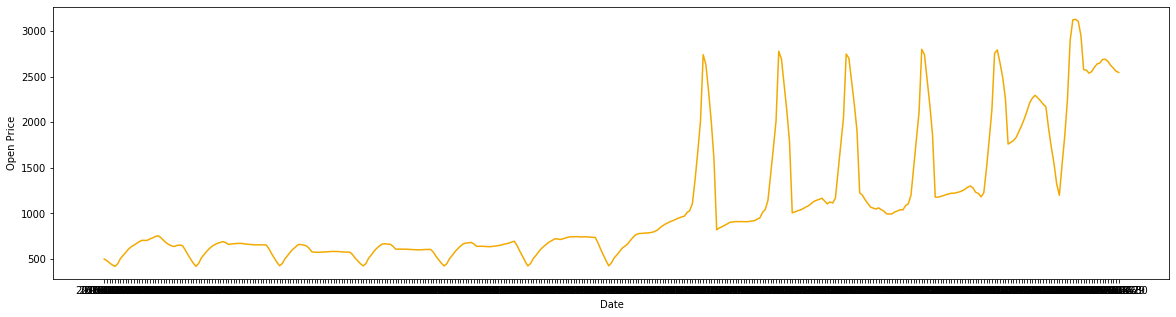

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
fig = sns.lineplot(df['Date'], df['MA5'],color="#f2a900");
fig.set(xlabel='Date', ylabel='Open Price')
plt.show()

역시 date column 너무 촘촘하게 있다보니 언제 살껄 포인트가 잘 보이지 않는다

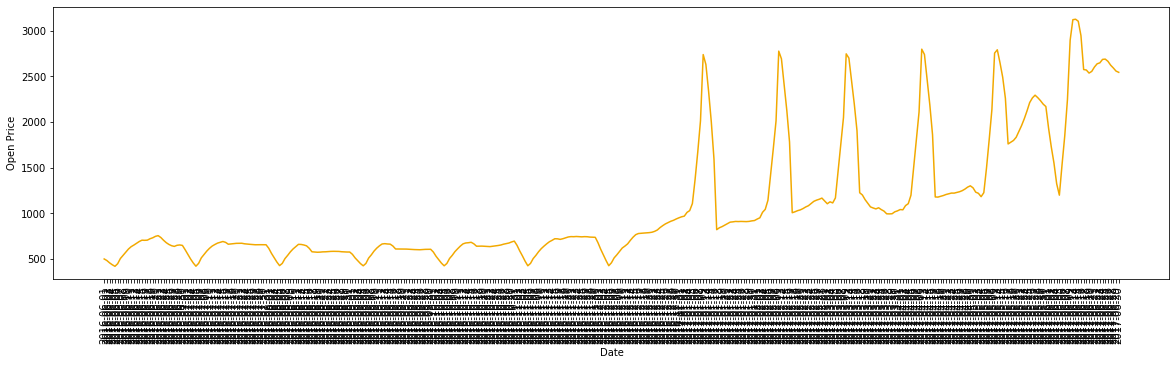

In [24]:
plt.figure(figsize=(20, 5))
ax = sns.lineplot(df['Date'], df['MA5'],color="#f2a900")
ax.set(xlabel='Date', ylabel='Open Price')
plt.xticks(rotation=90)
plt.show();

90도로 해봤지만 소용이 없다 역시  
x축 데이터를 month로 바꿀까 week으로 바꿀까

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['YM'] = df['Date'].dt.strftime('%Y-%m')
df.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap,MA5,YM
625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,499.006,2016-06
594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,481.718,2016-06


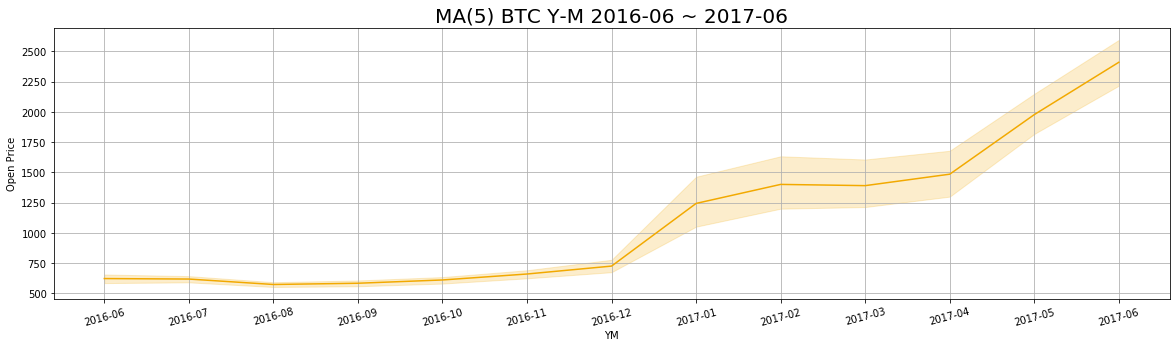

In [26]:
# sns.lineplot은 confidence interval 옵션도 있다. 
plt.figure(figsize=(20, 5))
ax = sns.lineplot(df['YM'], df['MA5'],color="#f2a900", legend="full")
ax.set(xlabel='YM', ylabel='Open Price')
plt.xticks(rotation=15)
plt.title("MA(5) BTC Y-M 2016-06 ~ 2017-06", fontsize=20)
plt.grid()
plt.show();

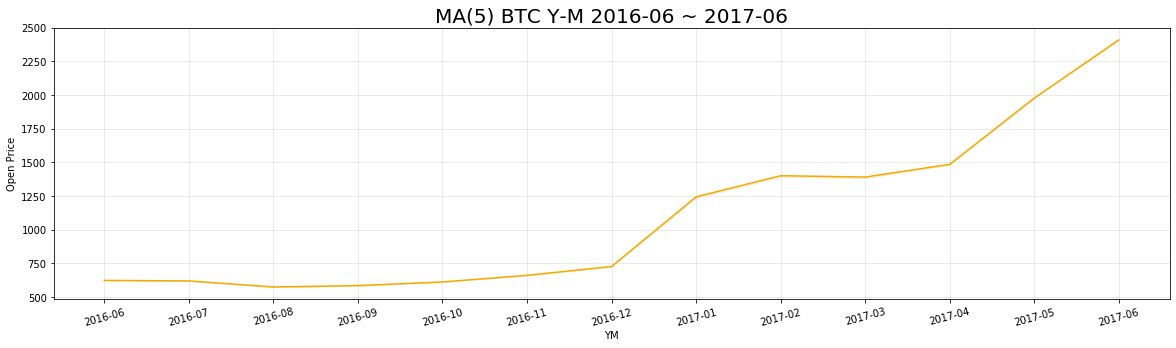

In [27]:
# sns.lineplot은 confidence interval 옵션도 있다. 
plt.figure(figsize=(20, 5))
ax = sns.lineplot(df['YM'], df['MA5'],color="#f2a900", ci=0)
ax.set(xlabel='YM', ylabel='Open Price')
plt.xticks(rotation=15)
plt.title("MA(5) BTC Y-M 2016-06 ~ 2017-06", fontsize=20)
plt.grid(alpha=0.33)
plt.show();

#### 2016년 12월에 살껄 

## **Bonus Part**

### **Plot Bitcoin and Ethereum of MA-5**

In [28]:
ETH = pd.read_csv("ETH_day.csv")
ETH.head(2)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44


In [29]:
ETH.Date.min(), ETH.Date.max()

('2016-05-09', '2020-04-15')

In [30]:
ETH['Date'] = pd.to_datetime(ETH['Date'])

In [31]:
ETH.head(2)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44


In [32]:
ETH.sort_values(['Date'],inplace=True)
ETH["MA5"] = ETH['Open'].rolling(window=5).mean()
display(ETH.head(2))

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,MA5
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06,NaN
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20,NaN


In [33]:
ETH['YM'] = ETH['Date'].dt.strftime('%Y-%m')

In [34]:
display(ETH.shape)
ETH = ETH[("2016-06-01" <= ETH['Date'])& (ETH['Date'] <= "2017-06-30")] # 2016.6 ~ 2017.6
display(ETH.shape)

(1438, 10)

(395, 10)

In [35]:
# head and tail로 정확히 나오는지 확인, min, max로도
display(ETH.head(2))
display(ETH.tail(2))
display(ETH['Date'].min(), ETH['Date'].max())

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,MA5,YM
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81,12.514,2016-06
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38,13.026,2016-06


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,MA5,YM
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.8,152271.32,46521350.06,288.066,2017-06
1020,2017-06-30,ETHUSD,293.80,304.94,270.77,280.8,146545.22,42337469.59,285.866,2017-06


Timestamp('2016-06-01 00:00:00')

Timestamp('2017-06-30 00:00:00')

### **Plotting**

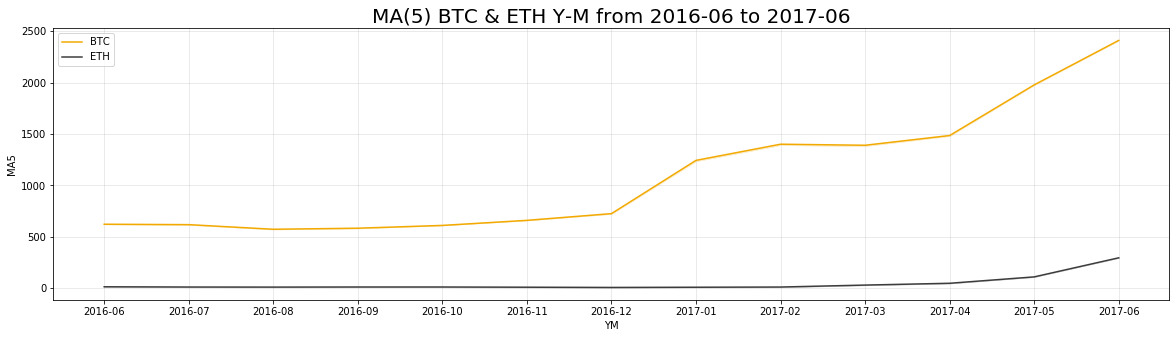

In [36]:
plt.figure(figsize=(20, 5))

sns.lineplot(df['YM'], df['MA5'],color="#f2a900", ci=0, label='BTC')
sns.lineplot(ETH['YM'], ETH['MA5'],color="#3c3c3d", ci=0, label='ETH')
plt.title("MA(5) BTC & ETH Y-M from 2016-06 to 2017-06", fontsize=20)
plt.grid(alpha=0.33)
plt.show();

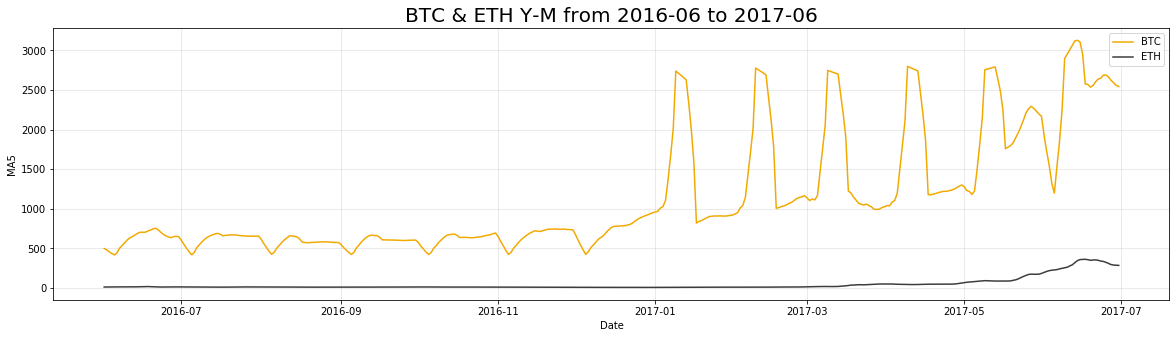

In [37]:
plt.figure(figsize=(20, 5))
sns.lineplot(df['Date'], df['MA5'],color="#f2a900", ci=0, label='BTC')
sns.lineplot(ETH['Date'], ETH['MA5'],color="#3c3c3d", ci=0, label='ETH')
plt.title("BTC & ETH Y-M from 2016-06 to 2017-06", fontsize=20)
plt.grid(alpha=0.33)
plt.show();

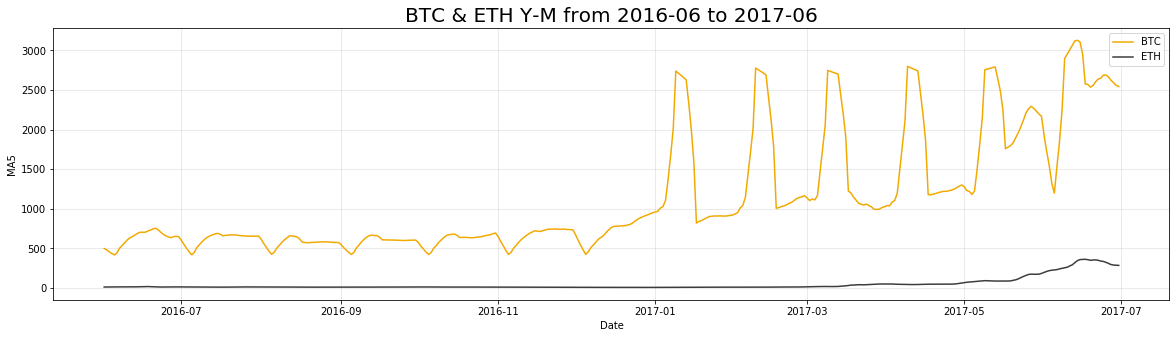

In [38]:
plt.figure(figsize=(20, 5))
sns.lineplot(df['Date'], df['MA5'],color="#f2a900", ci=0, label='BTC')
sns.lineplot(ETH['Date'], ETH['MA5'],color="#3c3c3d", ci=0, label='ETH')
plt.title("BTC & ETH Y-M from 2016-06 to 2017-06", fontsize=20)
plt.grid(alpha=0.33)
plt.show();

#### **FacetGrid Plot**

In [39]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap,MA5,YM
625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,499.006,2016-06
594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,481.718,2016-06


In [40]:
df['day'] = df["Date"].dt.day
ETH['day'] = ETH["Date"].dt.day

In [41]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap,MA5,YM,day
625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,499.006,2016-06,1
594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,481.718,2016-06,2


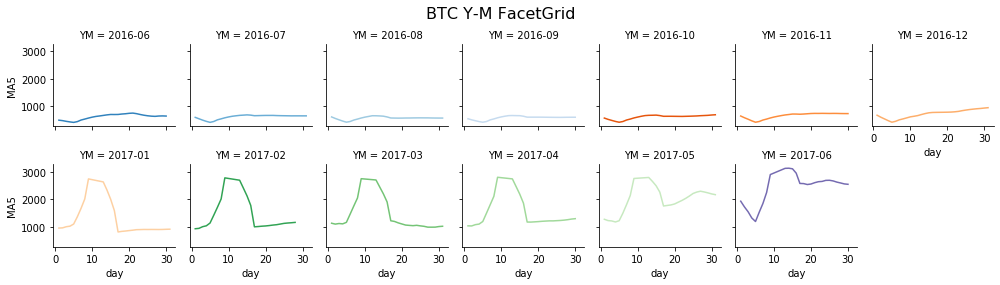

In [42]:
grid = sns.FacetGrid(df, col="YM", hue="YM", palette="tab20c",
                     col_wrap=7, height=2);
grid.map(sns.lineplot, "day", "MA5")
grid.fig.suptitle("BTC Y-M FacetGrid", size=16)
grid.fig.subplots_adjust(top=.85)

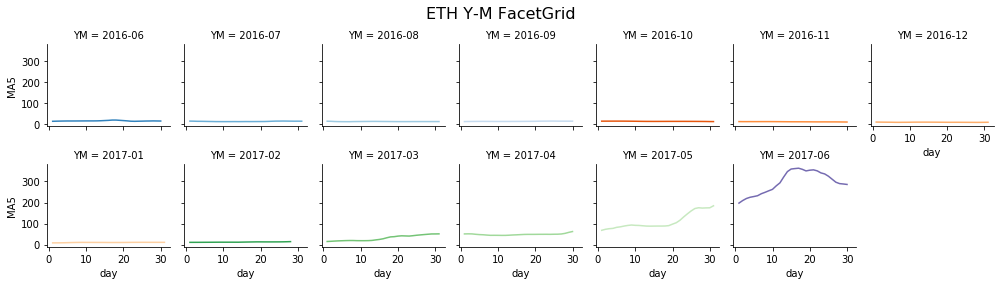

In [43]:
grid = sns.FacetGrid(ETH, col="YM", hue="YM", palette="tab20c",
                     col_wrap=7, height=2);
grid.map(sns.lineplot, "day", "MA5")
grid.fig.suptitle("ETH Y-M FacetGrid", size=16)
grid.fig.subplots_adjust(top=.85)

In [44]:
display(df.head(2))
display(ETH.head(2))

,Date,Open,High,Low,Close,Volume,Market Cap,MA5,YM,day
625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,499.006,2016-06,1
594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,481.718,2016-06,2


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,MA5,YM,day
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81,12.514,2016-06,1
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38,13.026,2016-06,2


In [45]:
df['Coin'] = "BTC"
ETH['Coin'] = "ETH"

In [46]:
display(df.shape)
display(ETH.shape)

(377, 11)

(395, 12)

In [47]:
total = pd.concat([df, ETH])
total.reset_index(inplace=True)
total.shape

(772, 15)

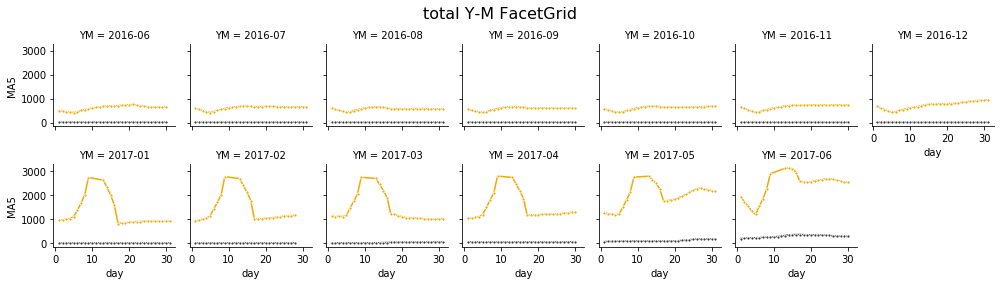

In [48]:
d = {'color': ['#f2a900', '#3c3c3d']}
grid = sns.FacetGrid(total, col="YM", hue="Coin", hue_kws=d,
                     col_wrap=7, height=2);
grid.map(sns.lineplot, "day", "MA5",ci=0,marker=".")
grid.fig.suptitle("total Y-M FacetGrid", size=16)
grid.fig.subplots_adjust(top=.85)

> BTC vs ETH img ref: <https://www.simplilearn.com/tutorials/blockchain-tutorial/ethereum-vs-bitcoin>

4년 전의 나에게:  
영끌해서 2016년도에 BTC, ETH 사렴